In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
from matplotlib.colors import LogNorm
from scipy.stats import multivariate_normal
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, svm, metrics
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = make_moons(n_samples = 1250, shuffle = False, noise = 0.1, random_state=1)
df[0][0][0]
x1 = []
x2 = []
label = []
n = len(df[1])
for i in range(0,n):
  x1.append(df[0][i][0])
  x2.append(df[0][i][1])
for i in range(0,n):
  label.append(df[1][i])
df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['label'] = label
label0 = df[df['label']==0]
label1 = df[df['label']==1]
label0train, label0test = train_test_split(label0, test_size=0.2)
label1train, label1test = train_test_split(label1, test_size=0.2)
df_train = [label0train, label1train]
df_test = [label0test, label1test]
df_train = pd.concat(df_train)
df_test = pd.concat(df_test)
df_train

,x1,x2,label
586,-1.124188,0.319568,0
85,0.845130,0.505147,0
406,-0.442559,0.833767,0
111,1.003751,0.541144,0
278,0.148100,1.132401,0
...,...,...,...
713,0.313343,0.146104,1
760,0.257687,-0.208144,1
1052,1.458793,-0.307138,1
1215,2.013099,0.452449,1


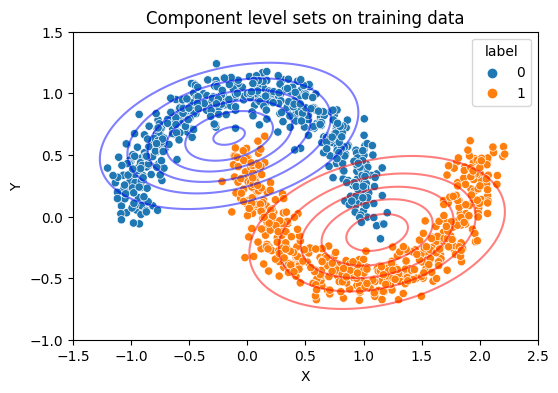

In [ ]:
features = ['x1', 'x2']
X =df_train[features]
gm = GaussianMixture(n_components=2, covariance_type='full', random_state=0).fit(X)

k = gm.means_.shape[0]
x = np.linspace(-1.5, 2.5, num=500)
y = np.linspace(-1.0, 1.5, num=500)
x_grid, y_grid = np.meshgrid(x, y)
coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

label0 = df_train[df_train['label']==0]
label1 = df_train[df_train['label']==1]

labels = []
for i in range(gm.means_.shape[0]):
    score0 = np.mean(multivariate_normal.pdf(label0[['x1', 'x2']], gm.means_[i], gm.covariances_[i]))
    score1 = np.mean(multivariate_normal.pdf(label1[['x1', 'x2']], gm.means_[i], gm.covariances_[i]))
    if score0 > score1:
        labels.append(0)
    else:
        labels.append(1)

fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df_train, x='x1', y='x2', hue='label', ax=ax).set(title="Component level sets on training data",
                                                                       xlabel='X', ylabel='Y')

cls = ['blue', 'red']
for i in range(k):
    mean = gm.means_[i]
    cov = gm.covariances_[i]
    z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
    ax.contour(x_grid, y_grid, z_grid, colors=cls[labels[i]], alpha=0.5)

plt.show()

In [ ]:
features = ['x1', 'x2']
X =df_train[features]
X_test = df_test[features]
for i in range(1,21):
  EM = GaussianMixture(n_components = i)
  EM.fit(X)
  print("Components = " + str(i), EM.bic(X_test))

Components = 1 982.8857768275001
Components = 2 936.2393211265498
Components = 3 845.2207082283456
Components = 4 785.0560075924552
Components = 5 783.0774638845453
Components = 6 764.1237363471048
Components = 7 776.0589670352347
Components = 8 788.9167211552659
Components = 9 821.8421489600998
Components = 10 843.5480471257852
Components = 11 875.8385158742053
Components = 12 912.8337656484639
Components = 13 943.341121907576
Components = 14 982.1398027979569
Components = 15 1027.072364329857
Components = 16 1054.3631382770238
Components = 17 1097.7233344881288
Components = 18 1137.6162230799207
Components = 19 1167.9311149993837
Components = 20 1206.5755319066293


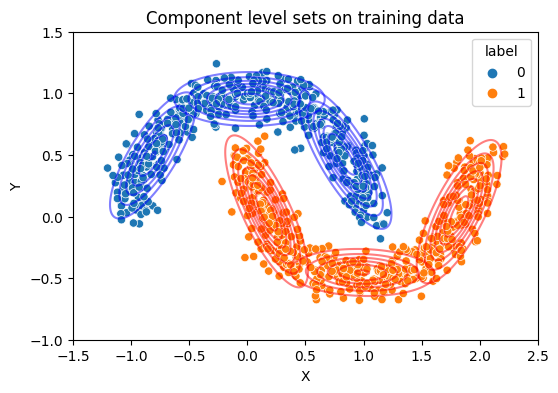

In [ ]:
features = ['x1', 'x2']
X =df_train[features]
gm = GaussianMixture(n_components=6, covariance_type='full', random_state=0).fit(X)

k = gm.means_.shape[0]
x = np.linspace(-1.5, 2.5, num=500)
y = np.linspace(-1.0, 1.5, num=500)
x_grid, y_grid = np.meshgrid(x, y)
coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

label0 = df_train[df_train['label']==0]
label1 = df_train[df_train['label']==1]

labels = []
for i in range(gm.means_.shape[0]):
    score0 = np.mean(multivariate_normal.pdf(label0[['x1', 'x2']], gm.means_[i], gm.covariances_[i]))
    score1 = np.mean(multivariate_normal.pdf(label1[['x1', 'x2']], gm.means_[i], gm.covariances_[i]))
    if score0 > score1:
        labels.append(0)
    else:
        labels.append(1)

fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df_train, x='x1', y='x2', hue='label', ax=ax).set(title="Component level sets on training data",
                                                                       xlabel='X', ylabel='Y')

cls = ['blue', 'red']
for i in range(k):
    mean = gm.means_[i]
    cov = gm.covariances_[i]
    z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
    ax.contour(x_grid, y_grid, z_grid, colors=cls[labels[i]], alpha=0.5)

plt.show()

Part 2

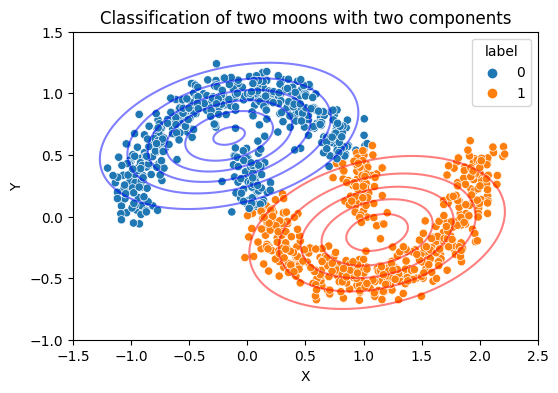

In [ ]:
features = ['x1', 'x2']
X =df_train[features]
gm = GaussianMixture(n_components=2, covariance_type='full', random_state=0).fit(X)

k = gm.means_.shape[0]
x = np.linspace(-1.5, 2.5, num=500)
y = np.linspace(-1.0, 1.5, num=500)
x_grid, y_grid = np.meshgrid(x, y)
coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

label0 = df_train[df_train['label']==0]
label1 = df_train[df_train['label']==1]

labels = []
for i in range(gm.means_.shape[0]):
    score0 = np.mean(multivariate_normal.pdf(label0[['x1', 'x2']], gm.means_[i], gm.covariances_[i]))
    score1 = np.mean(multivariate_normal.pdf(label1[['x1', 'x2']], gm.means_[i], gm.covariances_[i]))
    if score0 > score1:
        labels.append(0)
    else:
        labels.append(1)
df_predict = pd.DataFrame()
df_predict['x1'] = df_train['x1']
df_predict['x2'] = df_train['x2']
cluster_p = gm.predict(X)
'''for entry in range(0, len(cluster_p)):
  if cluster_p[entry]==0:
    cluster_p[entry] = 1
  else:
    cluster_p[entry] = 0'''
df_predict['label'] =cluster_p
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df_predict, x='x1', y='x2', hue='label', ax=ax).set(title="Classification of two moons with two components",
                                                                       xlabel='X', ylabel='Y')
cls = ['blue', 'red']
for i in range(k):
    mean = gm.means_[i]
    cov = gm.covariances_[i]
    z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
    ax.contour(x_grid, y_grid, z_grid, colors=cls[labels[i]], alpha=0.5)

plt.show()

[0.00713873532577838, 0.8111138873528974]
[1.4349023719178158e-07, 0.7250295033450883]
[0.8187675556627216, 0.0002841806072137254]
[0.8468143417752592, 3.90373627780573e-09]
[0.00020791368933244665, 0.8875710800670671]
[0.7723954249996965, 0.0034716648641391705]
{1: 1, 2: 1, 3: 0, 4: 0, 5: 1, 6: 0}
1 points are misclassified


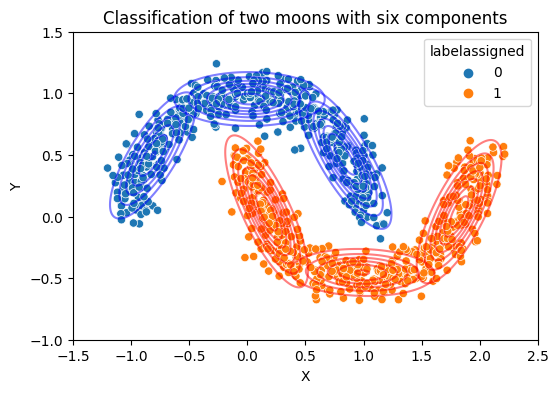

In [ ]:
features = ['x1', 'x2']
X =df_train[features]
gm = GaussianMixture(n_components=6, covariance_type='full', random_state=0).fit(X)

k = gm.means_.shape[0]
x = np.linspace(-1.5, 2.5, num=500)
y = np.linspace(-1.0, 1.5, num=500)
x_grid, y_grid = np.meshgrid(x, y)
coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

label0 = df_train[df_train['label']==0]
label1 = df_train[df_train['label']==1]

component_to_label = {}
for i in range(gm.means_.shape[0]):
    sumclass0 = 0
    sumclass1 = 0
    for index, row in label0.iterrows():
      mvn = multivariate_normal(gm.means_[i], gm.covariances_[i])
      sumclass0 += mvn.pdf(np.array([row['x1'], row['x2']]))
    for index, row in label1.iterrows():
      mvn = multivariate_normal(gm.means_[i], gm.covariances_[i])
      sumclass1 += mvn.pdf(np.array([row['x1'], row['x2']]))
    sumclass0 = sumclass0 / len(label0)
    sumclass1 = sumclass1 / len(label1)
    print([sumclass0, sumclass1])
    if sumclass0 > sumclass1:
      #print('Component ' + str(i+1) +' belongs to class 0.')
      component_to_label[i+1] = 0
    else:
      #print('Component ' + str(i+1) +' belongs to class 1.')
      component_to_label[i+1] = 1
print(component_to_label)

labelbasedongmm = []
misclassified = 0

for index, row in df_train.iterrows():
  highestcomponent = 0
  labelscore0 = 0
  labelscore1= 0
  for i in range(gm.means_.shape[0]):
    mvn = multivariate_normal(gm.means_[i], gm.covariances_[i])
    if component_to_label[i+1]==0:
      labelscore0 += mvn.pdf(np.array([row['x1'], row['x2']]))
    else:
      labelscore1 += mvn.pdf(np.array([row['x1'], row['x2']]))
  if labelscore0 > labelscore1:
    theassignedlabel = 0
  else:
    theassignedlabel = 1
  labelbasedongmm.append(theassignedlabel)
  if row['label'] != theassignedlabel:
    misclassified += 1
print(str(misclassified) + ' points are misclassified')

labels = []
for i in range(gm.means_.shape[0]):
    score0 = np.mean(multivariate_normal.pdf(label0[['x1', 'x2']], gm.means_[i], gm.covariances_[i]))
    score1 = np.mean(multivariate_normal.pdf(label1[['x1', 'x2']], gm.means_[i], gm.covariances_[i]))
    if score0 > score1:
        labels.append(0)
    else:
        labels.append(1)
df_train['labelassigned'] = labelbasedongmm
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df_train, x='x1', y='x2', hue='labelassigned', ax=ax).set(title="Classification of two moons with six components",
                                                                       xlabel='X', ylabel='Y')
cls = ['blue', 'red']
for i in range(k):
    mean = gm.means_[i]
    cov = gm.covariances_[i]
    z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
    ax.contour(x_grid, y_grid, z_grid, colors=cls[labels[i]], alpha=0.5)

plt.show()

[0.00713873532577838, 0.8111138873528974]
Component 1 belongs to class 1.
[1.4349023719178158e-07, 0.7250295033450883]
Component 2 belongs to class 1.
[0.8187675556627216, 0.0002841806072137254]
Component 3 belongs to class 0.
[0.8468143417752592, 3.90373627780573e-09]
Component 4 belongs to class 0.
[0.00020791368933244665, 0.8875710800670671]
Component 5 belongs to class 1.
[0.7723954249996965, 0.0034716648641391705]
Component 6 belongs to class 0.
{1: 1, 2: 1, 3: 0, 4: 0, 5: 1, 6: 0}
1 points are misclassified


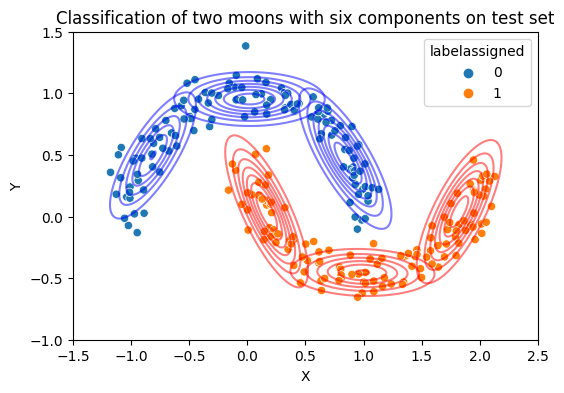

In [ ]:
features = ['x1', 'x2']
X =df_train[features]
gm = GaussianMixture(n_components=6, covariance_type='full', random_state=0).fit(X)

k = gm.means_.shape[0]
x = np.linspace(-1.5, 2.5, num=500)
y = np.linspace(-1.0, 1.5, num=500)
x_grid, y_grid = np.meshgrid(x, y)
coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

label0 = df_train[df_train['label']==0]
label1 = df_train[df_train['label']==1]

component_to_label = {}
for i in range(gm.means_.shape[0]):
    sumclass0 = 0
    sumclass1 = 0
    for index, row in label0.iterrows():
      mvn = multivariate_normal(gm.means_[i], gm.covariances_[i])
      sumclass0 += mvn.pdf(np.array([row['x1'], row['x2']]))
    for index, row in label1.iterrows():
      mvn = multivariate_normal(gm.means_[i], gm.covariances_[i])
      sumclass1 += mvn.pdf(np.array([row['x1'], row['x2']]))
    sumclass0 = sumclass0 / len(label0)
    sumclass1 = sumclass1 / len(label1)
    print([sumclass0, sumclass1])
    if sumclass0 > sumclass1:
      print('Component ' + str(i+1) +' belongs to class 0.')
      component_to_label[i+1] = 0
    else:
      print('Component ' + str(i+1) +' belongs to class 1.')
      component_to_label[i+1] = 1
print(component_to_label)

labelbasedongmm = []
misclassified = 0

for index, row in df_test.iterrows():
  highestcomponent = 0
  labelscore0 = 0
  labelscore1= 0
  for i in range(gm.means_.shape[0]):
    mvn = multivariate_normal(gm.means_[i], gm.covariances_[i])
    if component_to_label[i+1]==0:
      labelscore0 += mvn.pdf(np.array([row['x1'], row['x2']]))
    else:
      labelscore1 += mvn.pdf(np.array([row['x1'], row['x2']]))
  if labelscore0 > labelscore1:
    theassignedlabel = 0
  else:
    theassignedlabel = 1
  labelbasedongmm.append(theassignedlabel)
  if row['label'] != theassignedlabel:
    misclassified += 1
print(str(misclassified) + ' points are misclassified')

labels = []
for i in range(gm.means_.shape[0]):
    score0 = np.mean(multivariate_normal.pdf(label0[['x1', 'x2']], gm.means_[i], gm.covariances_[i]))
    score1 = np.mean(multivariate_normal.pdf(label1[['x1', 'x2']], gm.means_[i], gm.covariances_[i]))
    if score0 > score1:
        labels.append(0)
    else:
        labels.append(1)
df_test['labelassigned'] = labelbasedongmm
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df_test, x='x1', y='x2', hue='labelassigned', ax=ax).set(title="Classification of two moons with six components on test set",
                                                                       xlabel='X', ylabel='Y')
cls = ['blue', 'red']
for i in range(k):
    mean = gm.means_[i]
    cov = gm.covariances_[i]
    z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
    ax.contour(x_grid, y_grid, z_grid, colors=cls[labels[i]], alpha=0.5)

plt.show()

Text(0.5, 1.0, '500 generated points (6 component GMM)')

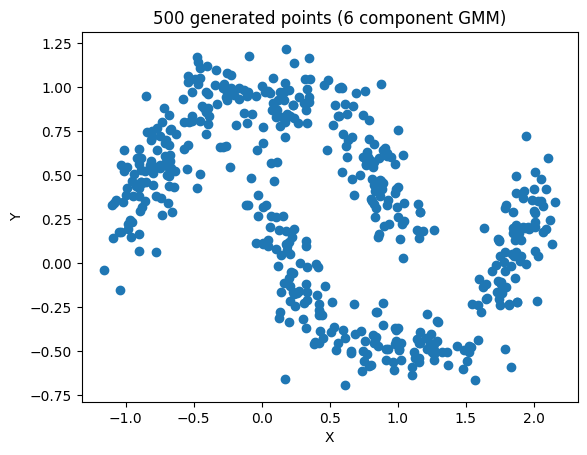

In [ ]:
moon_samples = gm.sample(500)
x1 = []
x2 = []
n = len(moon_samples[1])
for i in range(0,n):
  x1.append(moon_samples[0][i][0])
  x2.append(moon_samples[0][i][1])
moon_samples = pd.DataFrame()
moon_samples['x1'] = x1
moon_samples['x2'] = x2
plt.scatter(moon_samples['x1'], moon_samples['x2'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('500 generated points (6 component GMM)')

Part 3

In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

Text(0, 0.5, 'Cumulative Explained Variance')

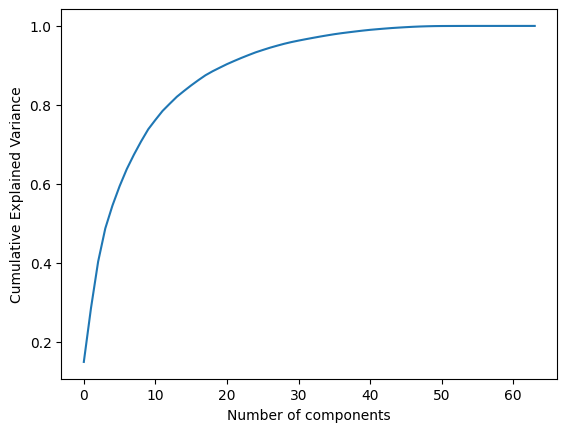

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

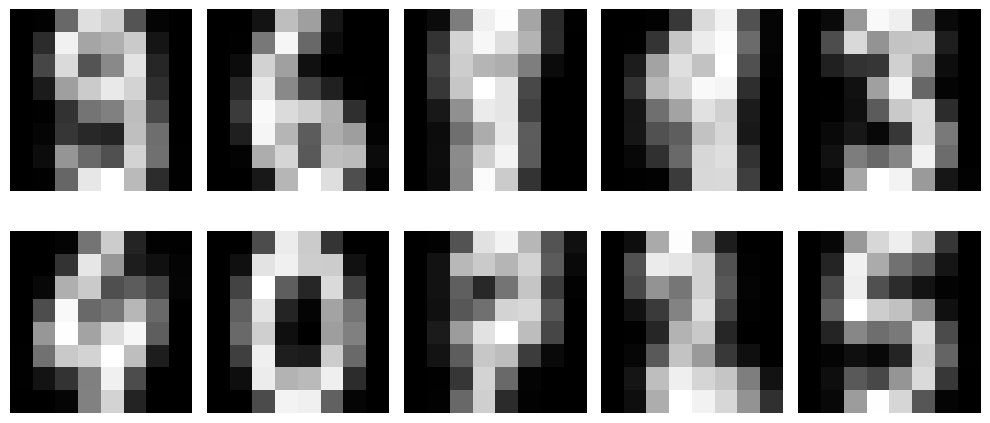

In [ ]:
pca = PCA(50).fit(digits.data)
X_pca = pca.fit_transform(digits.data)
gmm = GaussianMixture(n_components=10)
gmm.fit(X_pca)
generated_samples_pca = gmm.means_

generated_samples = pca.inverse_transform(generated_samples_pca)

generated_samples = generated_samples.reshape(-1, 8, 8)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_samples[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


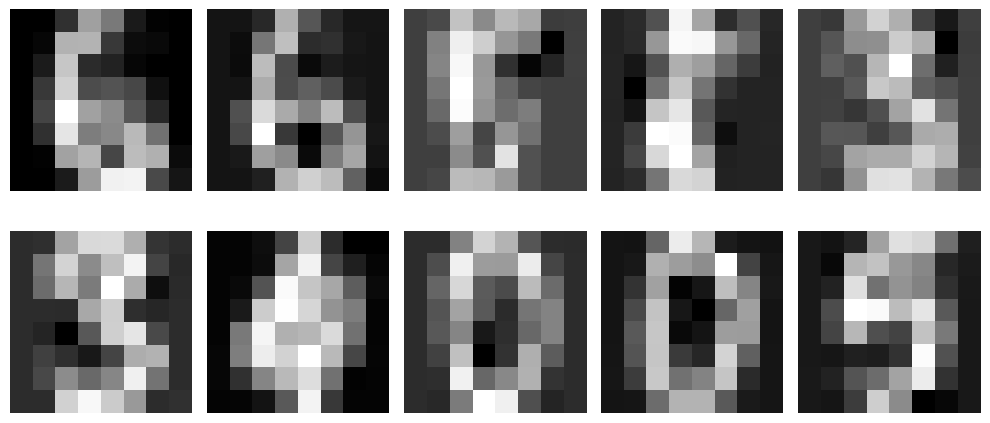

In [ ]:
n_samples = 10
generated_samples_pca = gmm.sample(n_samples)[0]

generated_samples = pca.inverse_transform(generated_samples_pca)

generated_samples = generated_samples.reshape(-1, 8, 8)

plt.figure(figsize=(10, 5))
for i in range(n_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_samples[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
y = digits.target

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_pca, y)

predicted_labels = clf.predict(generated_samples_pca)

print(predicted_labels)

[6 6 5 1 3 3 4 0 0 5]


In [ ]:
X = digits.data
y = digits.target

separated_data = {}
for label in np.unique(y):
    separated_data[label] = X[y == label]

for label, data in separated_data.items():
    print(f"Label {label}: {data.shape}")


Label 0: (178, 64)
Label 1: (182, 64)
Label 2: (177, 64)
Label 3: (183, 64)
Label 4: (181, 64)
Label 5: (182, 64)
Label 6: (181, 64)
Label 7: (179, 64)
Label 8: (174, 64)
Label 9: (180, 64)


[[0. 0. 0. ... 4. 0. 0.]
 [0. 0. 0. ... 4. 0. 0.]
 [0. 0. 0. ... 8. 0. 0.]
 ...
 [0. 0. 0. ... 7. 0. 0.]
 [0. 0. 0. ... 9. 0. 0.]
 [0. 0. 0. ... 4. 0. 0.]]


Text(0, 0.5, 'Cumulative Explained Variance')

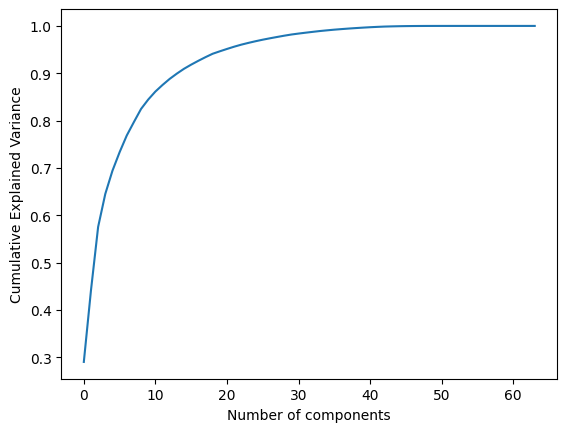

In [ ]:
label_3_data = separated_data[4]
print(label_3_data)
pca = PCA().fit(label_3_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

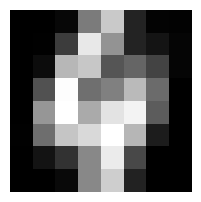

In [ ]:
pca = PCA(40).fit(label_3_data)
X_pca = pca.fit_transform(label_3_data)
n_components = 1
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X_pca)
generated_samples_pca = gmm.means_

generated_samples = pca.inverse_transform(generated_samples_pca)

generated_samples = generated_samples.reshape(-1, 8, 8)

plt.figure(figsize=(10, 5))
for i in range(n_components):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_samples[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


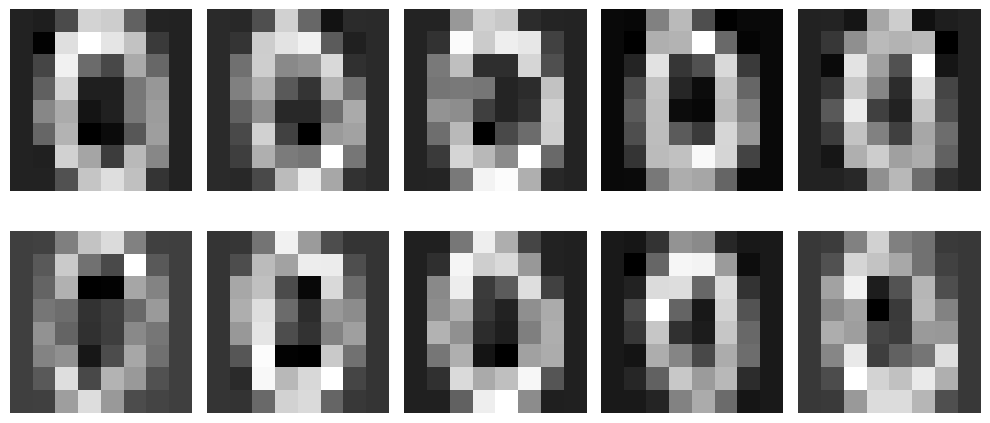

In [ ]:
n_samples = 10
generated_samples_pca = gmm.sample(n_samples)[0]

generated_samples = pca.inverse_transform(generated_samples_pca)

generated_samples = generated_samples.reshape(-1, 8, 8)

plt.figure(figsize=(10, 5))
for i in range(n_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_samples[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


[[0. 0. 5. ... 0. 0. 0.]
 [0. 0. 1. ... 3. 0. 0.]
 [0. 0. 3. ... 4. 0. 0.]
 ...
 [0. 0. 9. ... 4. 0. 0.]
 [0. 0. 5. ... 8. 1. 0.]
 [0. 0. 6. ... 6. 0. 0.]]


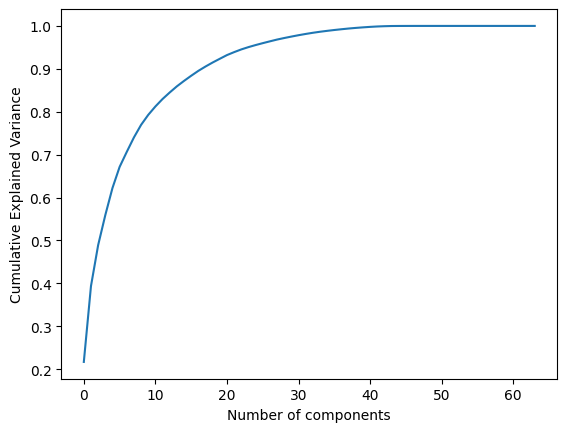

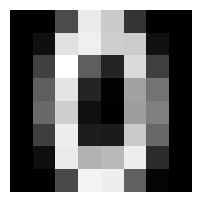

array([ 3.59263181e-16, -3.09365517e-16, -5.98771968e-17,  1.13766674e-15,
        1.99590656e-17, -4.54068743e-16,  5.98771968e-17,  4.14150611e-16,
        4.88997107e-16, -1.89611123e-16,  2.17054839e-16, -9.48055617e-17,
        1.64662291e-16, -4.40346885e-16,  3.26829699e-16,  2.86911568e-16,
        1.27239043e-16,  1.14764627e-16, -2.84416685e-16, -5.33905005e-16,
       -4.34109677e-16,  1.11022302e-16,  4.19140378e-16, -2.22668326e-16,
        6.52411957e-16, -3.81717130e-16,  3.76727363e-16,  2.07075306e-16,
       -3.49283648e-17,  1.18506952e-17,  3.20592491e-16,  1.21625556e-16,
       -1.77136707e-16, -1.14140906e-16, -3.61758064e-16, -1.09774861e-16,
       -4.46584093e-16,  3.09989238e-16,  9.69885845e-17,  6.48669632e-17])

In [ ]:
label_0_data = separated_data[0]
print(label_0_data)
pca = PCA().fit(label_0_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
pca = PCA(40).fit(label_0_data)
X_pca = pca.fit_transform(label_0_data)
n_components = 1
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X_pca)
generated_samples_pca = gmm.means_

generated_samples = pca.inverse_transform(generated_samples_pca)

generated_samples = generated_samples.reshape(-1, 8, 8)

plt.figure(figsize=(10, 5))
for i in range(n_components):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_samples[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
gmm.means_[0]

In [ ]:
gmmmeans = []
gmcovariances = []
gmweights = []
gmmmeans.append(gm.means_[0])
gmcovariances.append(gm.covariances_[0])
gmweights.append(gm.weights_[0])

[[ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  1.  0.]
 [ 0.  0.  0. ... 15.  4.  0.]
 ...
 [ 0.  0.  1. ... 10.  0.  0.]
 [ 0.  0.  8. ...  7.  0.  0.]
 [ 0.  0.  6. ...  4.  0.  0.]]


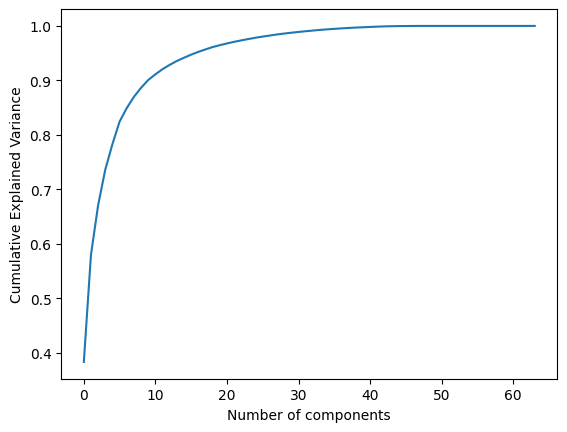

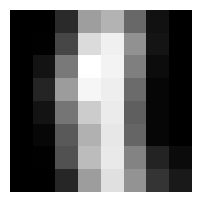

array([ 5.66091740e-16, -2.14724453e-16,  4.29448906e-16,  3.31846882e-16,
        6.63693764e-16, -1.56163239e-16, -8.83298318e-16, -2.89145997e-16,
       -4.14808603e-16, -3.02566275e-16,  7.61295788e-16,  5.17290728e-16,
       -1.02482125e-16,  4.53849412e-16, -5.89272221e-16, -7.41775383e-16,
        6.10012651e-18,  7.38115308e-16,  3.94068172e-16,  2.41565010e-16,
        3.26966781e-16,  1.19562480e-16,  3.36726983e-16,  1.26882631e-16,
        2.69625592e-16,  4.45309235e-16,  4.94110247e-16,  2.04964251e-16,
       -4.71539779e-16,  2.46445111e-16,  1.20782505e-16,  1.39082884e-16,
        4.11224778e-16,  1.29322682e-16,  7.93016446e-17,  3.64787565e-16,
        4.44089210e-16,  4.11758539e-16,  7.07614675e-17, -2.35464883e-16])

In [ ]:
label_1_data = separated_data[1]
print(label_1_data)
pca = PCA().fit(label_1_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
pca = PCA(40).fit(label_1_data)
X_pca = pca.fit_transform(label_1_data)
n_components = 1
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X_pca)
generated_samples_pca = gmm.means_

generated_samples = pca.inverse_transform(generated_samples_pca)

generated_samples = generated_samples.reshape(-1, 8, 8)

plt.figure(figsize=(10, 5))
for i in range(n_components):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_samples[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
gmm.means_[0]

In [ ]:
gmmmeans.append(gm.means_[0])
gmcovariances.append(gm.covariances_[0])
gmweights.append(gm.weights_[0])

[[ 0.  0.  0. ... 16.  9.  0.]
 [ 0.  0.  5. ... 13. 12.  4.]
 [ 0.  0.  8. ... 12. 13.  1.]
 ...
 [ 0.  3. 14. ... 11.  1.  0.]
 [ 0.  1. 10. ... 10.  9.  0.]
 [ 0.  0. 15. ...  6.  2.  0.]]


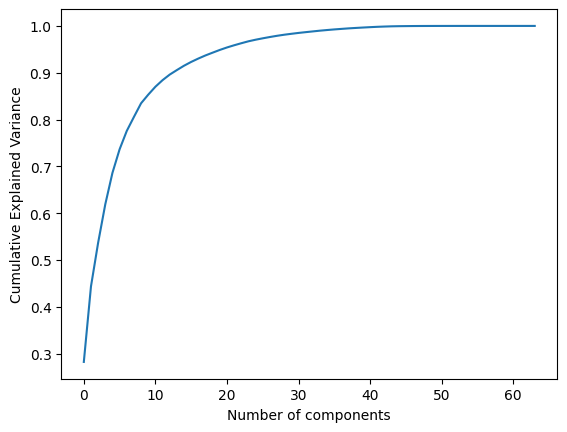

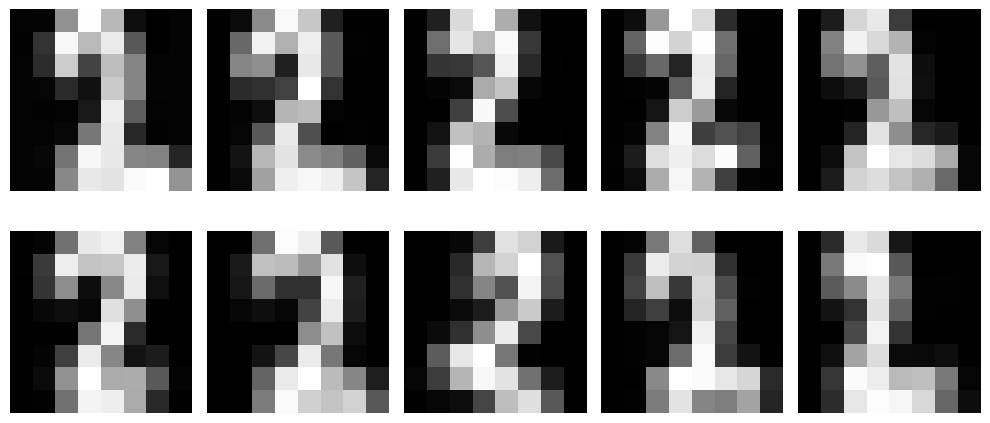

array([ 1.43488753e+01, -1.02849142e+01,  6.45735436e+00,  2.66610408e+00,
        1.57857518e+00,  1.62205644e+00,  3.03633395e+00, -1.40306399e+00,
       -3.39220382e+00, -2.81049815e-01, -1.19535692e-01, -3.05746585e-01,
        5.94562871e-01, -8.22273032e-01, -1.31103143e+00, -7.79493012e-01,
        4.13736958e-01, -4.74214057e-01,  1.09598751e+00, -7.41488804e-01,
       -2.82882815e-01, -9.22072626e-01,  6.13047191e-01, -7.11086076e-02,
        2.08401916e-02, -1.81922864e-01,  6.15498098e-02, -1.29410846e-01,
        7.70900760e-02, -9.06588718e-02,  1.67080965e-01, -3.73793201e-01,
       -1.51968937e-01, -8.49216296e-02, -1.21272696e-01, -4.80448272e-02,
        1.27503656e-02, -2.39354247e-01, -7.89422727e-02,  7.36203974e-03])

In [ ]:
label_2_data = separated_data[2]
print(label_2_data)
pca = PCA().fit(label_2_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
pca = PCA(40).fit(label_2_data)
X_pca = pca.fit_transform(label_2_data)
n_components = 10
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X_pca)
generated_samples_pca = gmm.means_

generated_samples = pca.inverse_transform(generated_samples_pca)

generated_samples = generated_samples.reshape(-1, 8, 8)

plt.figure(figsize=(10, 5))
for i in range(n_components):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_samples[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
gmmmeans.append(gm.means_[2])
gmcovariances.append(gm.covariances_[2])
gmweights.append(gm.weights_[2])
gmmmeans

[array([0.16663734, 0.0418942 ]),
 array([0.16663734, 0.0418942 ]),
 array([0.0185625 , 0.95364937]),
 array([0.0185625 , 0.95364937])]

[[ 0.  0.  7. ...  9.  0.  0.]
 [ 0.  2.  9. ... 11.  0.  0.]
 [ 0.  1.  8. ...  2.  0.  0.]
 ...
 [ 0.  0.  3. ...  8.  2.  0.]
 [ 0.  1.  7. ...  6.  0.  0.]
 [ 0.  2. 10. ...  9.  0.  0.]]


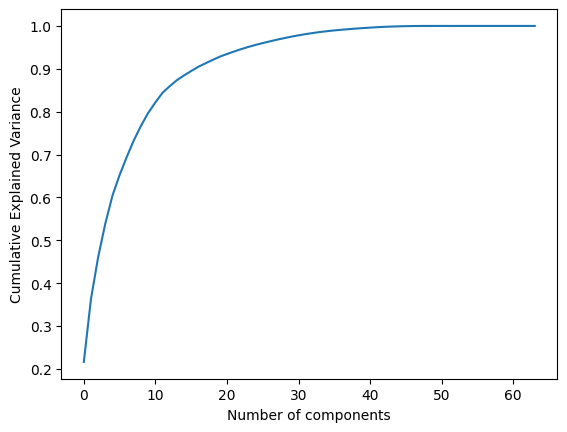

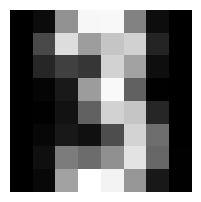

[[ 0.16663734  0.0418942 ]
 [ 1.82209436  0.03967725]
 [ 0.0185625   0.95364937]
 [-0.81101345  0.49575016]
 [ 0.99056838 -0.45419534]
 [ 0.84141149  0.46984625]]


In [ ]:
label_3_data = separated_data[3]
print(label_3_data)
pca = PCA().fit(label_3_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
pca = PCA(40).fit(label_3_data)
X_pca = pca.fit_transform(label_3_data)
n_components = 1
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X_pca)
generated_samples_pca = gmm.means_

generated_samples = pca.inverse_transform(generated_samples_pca)

generated_samples = generated_samples.reshape(-1, 8, 8)

plt.figure(figsize=(10, 5))
for i in range(n_components):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_samples[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
print(gm.means_)